## PROJECT TITLE 

#### AI Dermatologist: Detect skin lesions in a multi-class classification problem using CNNs

### NON-TECHNICAL EXPLANATION OF YOUR PROJECT
An AI dermatologist utilizing a skin diseases dataset employs Convolutional Neural Networks (CNNs) to analyze dermatological images. Through deep learning, CNNs automatically extract features from images, aiding in the classification of various skin conditions such as melanoma, psoriasis, and eczema. Trained on a diverse dataset, the model learns to distinguish between different skin diseases, assisting dermatologists in accurate diagnosis and treatment planning. This technology revolutionizes dermatology by providing efficient and reliable support in image-based diagnosis, enhancing patient care and outcomes through the integration of artificial intelligence in clinical practice.

### DATA
I am using the 20 Skin diseases dataset.

https://www.kaggle.com/datasets/haroonalam16/20-skin-diseases-dataset

('Acne and Rosacea Photos', 840), ('Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 322), ('Light Diseases and Disorders of Pigmentation', 299), ('Warts Molluscum and other Viral Infections', 248), ('Tinea Ringworm Candidiasis and other Fungal Infections', 122), ('Vascular Tumors', 101), ('Atopic Dermatitis Photos', 100), ('Lupus and other Connective Tissue diseases', 90), ('Systemic Disease', 81), ('Seborrheic Keratoses and other Benign Tumors', 80), ('Cellulitis Impetigo and other Bacterial Infections', 65), ('Poison Ivy Photos and other Contact Dermatitis', 62), ('Psoriasis pictures Lichen Planus and related diseases', 62), ('Herpes HPV and other STDs Photos', 40), ('Eczema Photos', 35), ('Melanoma Skin Cancer Nevi and Moles', 24), ('Exanthems and Drug Eruptions', 20), ('Vasculitis Photos', 15), ('Urticaria Hives', 3)

### MODEL 
I am using a CNN architecture inspired my LeNet5. CNNs offer a powerful and versatile framework for image analysis in dermatology, enabling automated diagnosis, classification, and decision support in clinical practice. Their ability to learn discriminative features directly from raw images makes them indispensable tools for AI-driven dermatological diagnosis and patient care.

#### HYPERPARAMETER OPTIMISATION
Various hyperparamters that I chose to tune were:
Learning Rate, Optimizer, number of epochs, Additonal CNN layers, number of filters, size of kernel, add dropout to prevent overfitting.

I used the following ideas: 
Learning Rate: Ensure that the learning rate used for training is appropriate. If the learning rate is too high, the optimization process may overshoot the optimal solution and fail to converge. Conversely, if the learning rate is too low, the optimization process may progress very slowly. Experiment with adjusting the learning rate, either increasing or decreasing it, and observe its impact on the loss curve.

Inspect Model Complexity: Evaluate if the model architecture is sufficiently complex to capture the underlying patterns in the data. If the model is too simple, it may struggle to learn the intricacies of the dataset, leading to poor performance. Consider increasing the model's capacity by adding more layers, increasing the number of filters in convolutional layers, or adding dropout layers to prevent overfitting.

Check Data Preprocessing: Ensure that the input data is preprocessed appropriately. Common preprocessing steps include normalization (scaling pixel values to the range [0, 1] or [-1, 1]), data augmentation (randomly applying transformations such as rotation, flipping, or scaling to increase dataset diversity), and handling missing or noisy data.

Increase Training Epochs: Sometimes, the model may require more training epochs to converge to a good solution. Try increasing the number of epochs beyond 5 and monitor the loss curve. However, be cautious of overfitting if training for too many epochs without regularization techniques.

Monitor Validation Loss: Check if the validation loss is also stagnant or increasing. If the validation loss is increasing while the training loss remains constant, it indicates overfitting. In such cases, consider using techniques like early stopping or regularization (e.g., dropout, weight decay) to prevent overfitting.

Explore Different Optimizers: Experiment with different optimization algorithms such as Adam, RMSprop, or SGD with momentum. Each optimizer has its strengths and may perform differently on your specific problem and dataset.

Debug Model Implementation: Double-check the implementation of your CNN model, loss function, and data loading pipeline for any bugs or inconsistencies. Ensure that the forward pass, backward pass, and gradient updates are correctly implemented.

### RESULTS
The dataset is imbalanced and produced the following results on each of the classes. The overall accuracy was 54 % 

Accuracy of Acne and Rosacea Photos : 90 %

Accuracy of Warts Molluscum and other Viral Infections : 37 %

Accuracy of Tinea Ringworm Candidiasis and other Fungal Infections : 28 %
Accuracy of Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions : 28 %

Accuracy of Seborrheic Keratoses and other Benign Tumors : 25 %

Accuracy of Systemic Disease : 14 %

Accuracy of Light Diseases and Disorders of Pigmentation : 13 %

Accuracy of Psoriasis pictures Lichen Planus and related diseases : 12 %
Accuracy of Lupus and other Connective Tissue diseases : 12 %

Accuracy of Atopic Dermatitis Photos :  8 %

Accuracy of Vascular Tumors :  8 %

Accuracy of Poison Ivy Photos and other Contact Dermatitis :  7 %

Accuracy of Urticaria Hives :  0 %

Accuracy of Eczema Photos :  0 %

Accuracy of Exanthems and Drug Eruptions :  0 %

Accuracy of Melanoma Skin Cancer Nevi and Moles :  0 %

Accuracy of Vasculitis Photos :  0 %

Accuracy of Cellulitis Impetigo and other Bacterial Infections :  0 %

Accuracy of Herpes HPV and other STDs Photos :  0 %

In [1]:
%matplotlib inline

In [2]:
import torchvision
from torchvision.datasets import ImageFolder
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms, utils
from torch.utils.data import Dataset
from PIL import Image
import os
import collections
import time
import matplotlib.pyplot as plt
import torch.optim as optim

In [3]:
import numpy as np
np.object = object 
np.bool = bool
import tensorflow
from torch.utils.tensorboard import SummaryWriter

### Lets define the transform to convert to image to 192x192x3 and normalize the image. 

In [42]:
#Apply transform

transform = transforms.Compose([
      # Resize images to 192x192 pixels
    transforms.ToTensor(),    
    transforms.Resize((192,192),antialias=True),# Convert images to tensors
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize pixel values
])
train_dir = './Dataset/train'

classes = [d for _,d,_ in os.walk(train_dir) if len(d)][0]
labels_map = {classes[k]:k for k in range(0,len(classes))}
len(classes)
imbalance = collections.defaultdict(int)
for dirpath, dirnames, filenames in os.walk(train_dir):
    for f in filenames:
        if not f.startswith('.'):
            full_path = os.path.join(dirpath, f)  # Construct full path once
            imbalance[full_path.split('/')[-2]] += 1

print(sorted(imbalance.items(), key=lambda k:k[1], reverse=True))


[('Acne and Rosacea Photos', 840), ('Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 322), ('Light Diseases and Disorders of Pigmentation', 299), ('Warts Molluscum and other Viral Infections', 248), ('Tinea Ringworm Candidiasis and other Fungal Infections', 122), ('Vascular Tumors', 101), ('Atopic Dermatitis Photos', 100), ('Lupus and other Connective Tissue diseases', 90), ('Systemic Disease', 81), ('Seborrheic Keratoses and other Benign Tumors', 80), ('Cellulitis Impetigo and other Bacterial Infections', 65), ('Poison Ivy Photos and other Contact Dermatitis', 62), ('Psoriasis pictures Lichen Planus and related diseases', 62), ('Herpes HPV and other STDs Photos', 40), ('Eczema Photos', 35), ('Melanoma Skin Cancer Nevi and Moles', 24), ('Exanthems and Drug Eruptions', 20), ('Vasculitis Photos', 15), ('Urticaria Hives', 3)]


### Define a custom dataset to get the image and labels

In [5]:
class SkinCondition(Dataset):
    def __init__(self, data_directory, transform=None):
        self.data_directory = data_directory
        self.transform = transform
        self.filenames = []
        self.labels = []
        for dirpath, dirnames, filenames in os.walk(data_directory):
            for f in filenames:
                if not f.startswith('.'):
                    full_path = os.path.join(dirpath, f)  # Construct full path once
                    self.filenames.append(full_path) 
                    self.labels.append(labels_map[full_path.split('/')[-2]])
    
    def __len__(self):
        return len(self.filenames)
    
    def __getitem__(self, idx):
        img_path = self.filenames[idx]  
        image = Image.open(img_path)
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

In [6]:
trainset = SkinCondition(data_directory='./Dataset/train', transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=10,
                                          shuffle=True, num_workers=0)
print("Length of training data:", len(trainset))

testset = SkinCondition(data_directory='./Dataset/test', transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=5,
                                         shuffle=False, num_workers=0)
print("Length of test data:", len(testset))


Length of training data: 2609
Length of test data: 895


### Let us show some of the training images



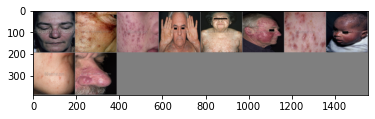

Acne and Rosacea Photos Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions Acne and Rosacea Photos Psoriasis pictures Lichen Planus and related diseases


In [7]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

###  Define a Convolutional Neural Network inspired from LeNet5

In [8]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self, name=None):
        super(Net, self).__init__()
        if name:
            self.name = name
        self.dense = 16 * 45 * 45
        self.conv1 = nn.Conv2d(3, 8, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(8, 16, 5)
        #add dropout to prevent overfitting
        self.dropout = nn.Dropout(p=0.5)  
        self.fc1 = nn.Linear(self.dense, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, len(trainset.labels))
        
        # compute the total number of parameters
        total_params = sum(p.numel() for p in self.parameters() if p.requires_grad)
        print(self.name + ': total params:', total_params)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, self.dense)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net(name='LetNet5')

LetNet5: total params: 4123873


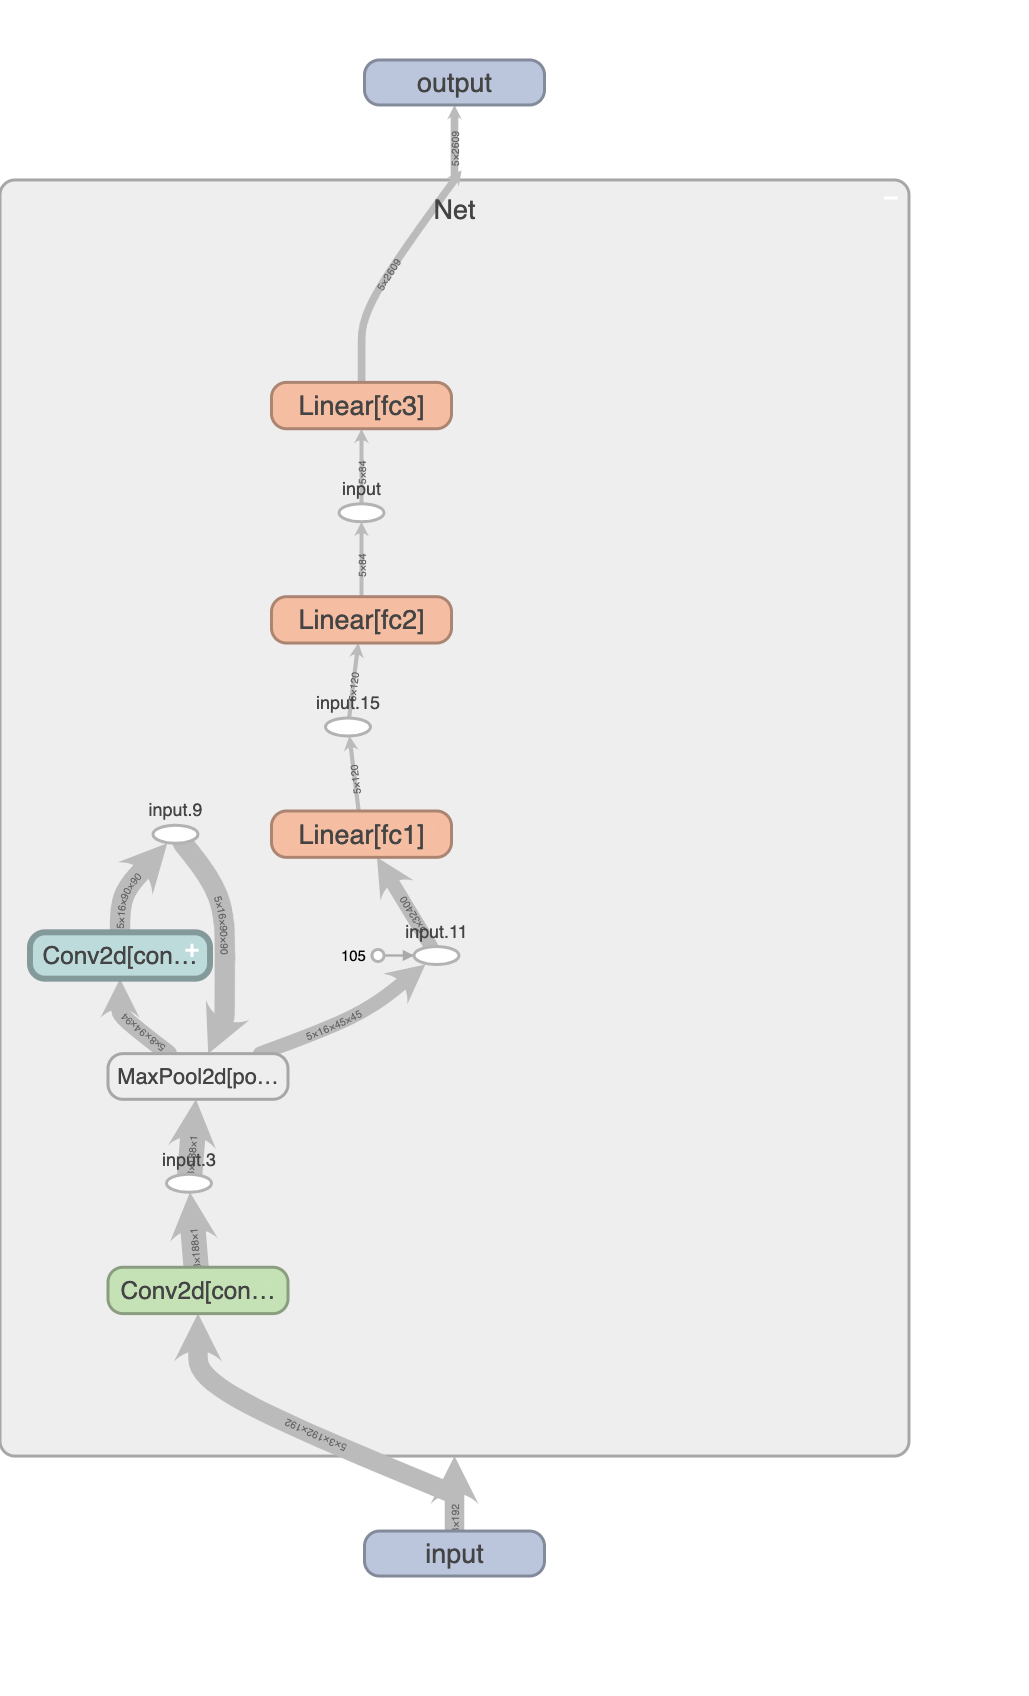

In [9]:
def train(net, trainloader, epochs=10):
    start = time.time()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(net.parameters(), lr=0.001)
    losses = []
    for epoch in range(epochs):  # loop over the dataset multiple times

        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            if i % 10 == 9:    # print every 2000 mini-batches
                print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 10))
                losses.append(running_loss / 10)
                running_loss = 0.0

    print('Finished Training')

    end = time.time()
    print('training time ', end-start)
    return losses

In [10]:
def plot_losses(losses):
    X = range(1,len(losses)+1)
    plt.plot(X,losses)

In [11]:
def test(net, testloader):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(correct,total)
    print('Accuracy of the network on the 895 test images: %d %%' % (
        100 * correct / total))

In [12]:
epochs=10
losses = train(net, trainloader, epochs)


[1,    10] loss: 6.743
[1,    20] loss: 5.021
[1,    30] loss: 3.596
[1,    40] loss: 3.045
[1,    50] loss: 2.972
[1,    60] loss: 2.539
[1,    70] loss: 2.338
[1,    80] loss: 2.605
[1,    90] loss: 2.530
[1,   100] loss: 2.326
[1,   110] loss: 2.378
[1,   120] loss: 2.145
[1,   130] loss: 2.177
[1,   140] loss: 2.473
[1,   150] loss: 2.324
[1,   160] loss: 2.290
[1,   170] loss: 2.634
[1,   180] loss: 2.441
[1,   190] loss: 2.550
[1,   200] loss: 2.270
[1,   210] loss: 2.380
[1,   220] loss: 2.360
[1,   230] loss: 2.475
[1,   240] loss: 2.409
[1,   250] loss: 2.308
[1,   260] loss: 2.354
[2,    10] loss: 2.378
[2,    20] loss: 2.465
[2,    30] loss: 2.250
[2,    40] loss: 2.345
[2,    50] loss: 2.475
[2,    60] loss: 2.319
[2,    70] loss: 2.473
[2,    80] loss: 2.459
[2,    90] loss: 2.211
[2,   100] loss: 2.126
[2,   110] loss: 2.089
[2,   120] loss: 2.313
[2,   130] loss: 2.346
[2,   140] loss: 2.497
[2,   150] loss: 2.368
[2,   160] loss: 2.251
[2,   170] loss: 2.046
[2,   180] 

### Plot training loss for all epochs

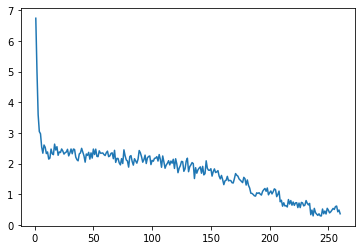

In [20]:
plot_losses(losses)

In [21]:
test(net, testloader)

486 895
Accuracy of the network on the 895 test images: 54 %


That looks way better than chance, which is 5% accuracy (randomly picking
a class out of 19 classes).
Seems like the network learnt something.

Hmmm, what are the classes that performed well, and the classes that did
not perform well:



In [22]:
class_correct = list(0. for i in range(20))
class_total = list(0. for i in range(20))
classes_test = [d for _,d,_ in os.walk('./Dataset/test') if len(d)][0]

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(5):
            label = labels[i]
            class_correct[label] += int(c[i].item())
            class_total[label] += 1



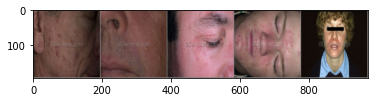

GroundTruth:  Acne and Rosacea Photos
GroundTruth:  Psoriasis pictures Lichen Planus and related diseases
GroundTruth:  Tinea Ringworm Candidiasis and other Fungal Infections
GroundTruth:  Psoriasis pictures Lichen Planus and related diseases
GroundTruth:  Acne and Rosacea Photos
Predicted:  Acne and Rosacea Photos
Predicted:  Acne and Rosacea Photos
Predicted:  Tinea Ringworm Candidiasis and other Fungal Infections
Predicted:  Psoriasis pictures Lichen Planus and related diseases
Predicted:  Warts Molluscum and other Viral Infections


In [48]:
testloader = torch.utils.data.DataLoader(testset, batch_size=5,
                                         shuffle=True)

dataiter = iter(testloader)
images, labels = next(dataiter)
# print images
img_grid = torchvision.utils.make_grid(images)

imshow(img_grid)
for j in range(5):
    print('GroundTruth: ', ''.join('%5s' % classes[labels[j]]))
    
outputs = net(images)

_, predicted = torch.max(outputs, 1)
for j in range(5):
    print('Predicted: ', ''.join('%5s' % classes[predicted[j]]))


In [40]:
writer = SummaryWriter('runs/ai-derm')
writer.add_image('acne_images', img_grid)


In [41]:
writer.add_graph(net, images)

In [27]:
accuracy = collections.defaultdict(float)
for i in range(len(classes_test)):
    accuracy[classes[i]] = 100 * class_correct[i] / class_total[i]

for k,v in sorted(accuracy.items(), key=lambda k: k[1], reverse=True):
    print('Accuracy of %5s : %2d %%' % (
        k, v))

Accuracy of Acne and Rosacea Photos : 90 %
Accuracy of Warts Molluscum and other Viral Infections : 37 %
Accuracy of Tinea Ringworm Candidiasis and other Fungal Infections : 28 %
Accuracy of Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions : 28 %
Accuracy of Seborrheic Keratoses and other Benign Tumors : 25 %
Accuracy of Systemic Disease : 14 %
Accuracy of Light Diseases and Disorders of Pigmentation : 13 %
Accuracy of Psoriasis pictures Lichen Planus and related diseases : 12 %
Accuracy of Lupus and other Connective Tissue diseases : 12 %
Accuracy of Atopic Dermatitis Photos :  8 %
Accuracy of Vascular Tumors :  8 %
Accuracy of Poison Ivy Photos and other Contact Dermatitis :  7 %
Accuracy of Urticaria Hives :  0 %
Accuracy of Eczema Photos :  0 %
Accuracy of Exanthems and Drug Eruptions :  0 %
Accuracy of Melanoma Skin Cancer Nevi and Moles :  0 %
Accuracy of Vasculitis Photos :  0 %
Accuracy of Cellulitis Impetigo and other Bacterial Infections :  0 %
Accuracy of H

### This is consistent with the imbalance of data in the above classes. 